# Neural Network from Scratch

### Start with the XOR problem
- the needs of nonlinearity

## NEURAL NETWORK
---------

### What is Neural Network

<h4> *It is a good function approximators that based loosely on the ways in which the brain is believed to work* </h4> 

<img src="images/human_brain.jpg"/>
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **Structure of Neurons Brain**</center></caption>

<h3> Analogy of Artificial Neural Network With Biological Neural Network </h3>
<br/>
<h4> Frank Rosenblatt’s Perceptron </h4>
<br/>
<img src="images/ann_analogy.jpg", style="width:450px;height:320px;"/>
<caption><center> <u> <font color='purple'> **Figure 2** </u><font color='purple'>  : **Artificial Neural Network** <br> Analogy of Artificial Neural Network With Biological Neural Network </center></caption>


- The dendrites in biological neural network is analogous to the weighted inputs based on their synaptic interconnection in artificial neural network.
- Cell body is analogous to the artificial neuron unit in artificial neural network which also comprises of summation and threshold unit.
- Axon carry output that is analogous to the output unit in case of artificial neural network. So, ANN are modelled using the working of basic biological neurons.</p>

###### The main idea was to define an algorithm in order to learn the values of the weights w that are then multiplied with the input features in order to make a decision whether a neuron fires or not.
-------
<br/><br/>
<img src="images/how_a_neuron_works.jpg", style="width:550px;height:320px;"/>
<br/>

- Each input is multiplied by its corresponding weights. 
  Typically weight represents the strength of the interconnection between neurons inside the neural network.
  
- The weighted inputs are all summed up inside computing unit (artificial neuron). 
  In case the weighted sum is zero, bias is added to make the output not- zero or to scale up the system response.   Bias has the weight and input always equal to ‘1’.
  
- The sum corresponds to any numerical value ranging from 0 to infinity. 
  In order to limit the response to arrive at desired value, the threshold value is set up. For this, the sum is passed through activation function.


<img src="https://media.condenast.io/photos/59f36f317953d714f00d7706/master/pass/unnamed0.png", style="width:550px;height:320px;"/>
Neural networks are structured as a series of layers, each composed of one or more neurons. Each neuron produces an output, or activation, based on the outputs of the previous layer and a set of weights.

### Activation Functions
---
Activation functions are important component in ANN. 
 - It helps the neuron to learn and make sense of something really complicated
 - Non-linear complex functional mappings between the inputs and response variable. They introduce non-linear properties to our Network.
 - Main purpose is to convert a input signal of a node to an output signal. That output signal now is used as a input in the next layer in the stack.

<h4> Sigmoid Function </h4>
<img src="images/sigmoid.png", style="width:150px;height:80px;"/>
<img src="images/sigmoid_plot.png", style="width:250px;height:120px;"/>

<br/>
<h4> Tanh Function </h4>
<img src="images/tanh.png"/, style="width:150px;height:80px;">
<img src="images/tanh_plot.png"/, style="width:250px;height:120px;">
<br/>
<h4> Rectified Linear Unit (ReLU)</h4>
<img src="images/ReLU.jpeg"/>

### What does Training mean in NN
-------

** Training in NN means minimizing the cost (how big is the difference between our prediction and the true label) **
- we have to tweak the weights and bias in order to minimize the cost


<h4> HOW </h4>
*Calculus*
<p>Calculus tells us that by setting the derivative of the cost function to zero, we can get the locations of every minimum/maximum in the function. However:</p>
- We don’t have a simple equation for our cost function, so computing an expression for the derivative and solving it isn’t trivial.
- The function is many-dimensional (each weight gets its own dimension) — we need to find the points where all of those derivatives are zero. Also not so trivial
- There are lots of minimums and maximums throughout the function, and sorting out which one is the one you should be using can be computationally expensive.

<h3> Gradient Descent </h3>
<img src="images/gradient_descent.png"/, style="width:350px;height:200px;">
<br/>
- We start off by initializing our weight randomly
- Feedforward, make prediction
- 
- Taking the derivative of W and b with respect to J
- 
<img src="https://cdn-images-1.medium.com/max/1600/1*U0VohJIM1F_bE5Msmjzv4Q.png", style="width:150px;height:90px;"/>


<h3> Learning Algorithms used in Neural Network </h3>


<br/>
<h3> Backpropagation </h3>
<img src="images/backprop.png", style="width:550px;height:320px;"/>

In [6]:
def compute_cost(self, A2, Y):
        """
        Computes the cross-entropy cost 
        """
        m = Y.shape[0] # number of example
        logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
        cost = - np.sum(logprobs) / m
        cost = np.squeeze(cost)
        return cost

In [4]:
def backprop(self, X, Y):
        m = X.shape[0]
    
        self.dZ2 = self.A2 - Y


        self.dW2 = (1. / m) * np.dot(self.A1.T, self.dZ2)
        self.db2 = (1. / m) * np.sum(self.dZ2, axis=0, keepdims=True)


        self.dZ1 = np.multiply(np.dot(self.dZ2, self.W2.T ), 1 - np.power(self.A1, 2))
        self.dW1 = (1. / m) * np.dot(X.T, self.dZ1) 
        self.db1 = (1. / m) * np.sum(self.dZ1, axis=0, keepdims=True)

In [5]:
def update_parameters(self):
        self.W1 -= self.learning_rate * self.dW1
        self.b1 -= self.learning_rate * self.db1 
        self.W2 -= self.learning_rate * self.dW2
        self.b2 -= self.learning_rate * self.db2

<h3> Our NN Model for the XOR problem </h3>
<img src="images/example_nn.jpg", style="width:650px;height:300px;"/>

##### Step by Step
- Define our architecture
- Prepare the data
- Initialize the learnable parameters (weights and biases)
- Forward Propagation
- Compute cost
- Backward Propagation
- Update parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [66]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape((4, )), cmap=plt.cm.Spectral)

In [4]:
class NN(object):
    
    def __init__(self, n_x, n_h, n_y, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.W1 = np.random.randn(n_x, n_h)
        self.b1 = np.zeros(shape=(1, n_h))
        self.W2 = np.random.randn(n_h, n_y)
        self.b2 = np.zeros(shape=(1, n_y))
    
    def _sigmoid(self, Z):
        return (1 / (1 + np.exp(-Z)))
    
    def feedforward(self, X):
        # first hidden layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = np.tanh(self.Z1)

        # second layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self._sigmoid(self.Z2)

        return self.A2
    
    def compute_cost(self, A2, Y):
        """
        Computes the cross-entropy cost 
        """
        m = Y.shape[0] # number of example
        logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
        cost = - np.sum(logprobs) / m
        cost = np.squeeze(cost)     # makes sure cost is the dimension we expect.
        return cost
    
    
    def backprop(self, X, Y):
        m = X.shape[0]
    
        self.dZ2 = self.A2 - Y


        self.dW2 = (1. / m) * np.dot(self.A1.T, self.dZ2)
        self.db2 = (1. / m) * np.sum(self.dZ2, axis=0, keepdims=True)


        self.dZ1 = np.multiply(np.dot(self.dZ2, self.W2.T ), 1 - np.power(self.A1, 2))
        self.dW1 = (1. / m) * np.dot(X.T, self.dZ1) 
        self.db1 = (1. / m) * np.sum(self.dZ1, axis=0, keepdims=True)
        
    def update_parameters(self):
        self.W1 -= self.learning_rate * self.dW1
        self.b1 -= self.learning_rate * self.db1 
        self.W2 -= self.learning_rate * self.dW2
        self.b2 -= self.learning_rate * self.db2
    
    
    def predict(self, X):
        A2 = self.forward(X)
        predictions = np.round(A2)
        return predictions

In [ ]:
X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
y = np.array([[0,1,1,0]]).T

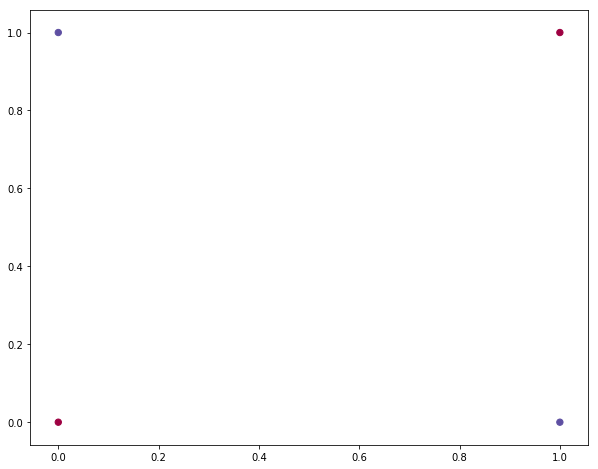

In [65]:
plt.scatter(X[:,0], X[:,1], s=40, c=y.reshape((4, )), cmap=plt.cm.Spectral)

In [69]:
def build_model(X, y, num_hidden, learning_rate=0.01, num_iterations=50000, verbose=True):
    model = NN(n_x=2, n_h=num_hidden, n_y=1, learning_rate=learning_rate)
    cost_history = []
    for i in range(0, num_iterations):
        A2 = model.feedforward(X)
        cost = model.compute_cost(A2, y)
        model.backprop(X, y)
        model.update_parameters()
        if i % 1000 == 0 and verbose:
            print ("Iteration %i Cost: %f" % (i, cost))
            
        cost_history.append(cost)
    return model, cost_history

Iteration 0 Cost: 0.675016
Iteration 1000 Cost: 0.558975
Iteration 2000 Cost: 0.490138
Iteration 3000 Cost: 0.445402
Iteration 4000 Cost: 0.418540
Iteration 5000 Cost: 0.401818
Iteration 6000 Cost: 0.390783
Iteration 7000 Cost: 0.383098
Iteration 8000 Cost: 0.377503
Iteration 9000 Cost: 0.373278
Iteration 10000 Cost: 0.369992
Iteration 11000 Cost: 0.367373
Iteration 12000 Cost: 0.365242
Iteration 13000 Cost: 0.363478
Iteration 14000 Cost: 0.361996
Iteration 15000 Cost: 0.360735
Iteration 16000 Cost: 0.359650
Iteration 17000 Cost: 0.358707
Iteration 18000 Cost: 0.357881
Iteration 19000 Cost: 0.357151
Iteration 20000 Cost: 0.356501
Iteration 21000 Cost: 0.355920
Iteration 22000 Cost: 0.355396
Iteration 23000 Cost: 0.354922
Iteration 24000 Cost: 0.354490
Iteration 25000 Cost: 0.354095
Iteration 26000 Cost: 0.353733
Iteration 27000 Cost: 0.353399
Iteration 28000 Cost: 0.353089
Iteration 29000 Cost: 0.352801
Iteration 30000 Cost: 0.352533
Iteration 31000 Cost: 0.352281
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 3 neurons')

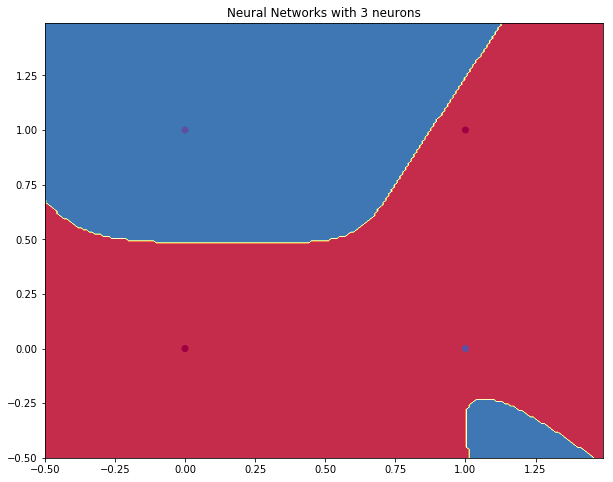

In [72]:
model, _ = build_model(X, y, 3)
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 3 neurons")

Iteration 0 Cost: 0.872109
Iteration 1000 Cost: 0.639951
Iteration 2000 Cost: 0.548575
Iteration 3000 Cost: 0.476667
Iteration 4000 Cost: 0.433269
Iteration 5000 Cost: 0.408599
Iteration 6000 Cost: 0.393780
Iteration 7000 Cost: 0.384214
Iteration 8000 Cost: 0.377644
Iteration 9000 Cost: 0.372902
Iteration 10000 Cost: 0.369342
Iteration 11000 Cost: 0.366583
Iteration 12000 Cost: 0.364390
Iteration 13000 Cost: 0.362608
Iteration 14000 Cost: 0.361135
Iteration 15000 Cost: 0.359898
Iteration 16000 Cost: 0.358847
Iteration 17000 Cost: 0.357943
Iteration 18000 Cost: 0.357157
Iteration 19000 Cost: 0.356469
Iteration 20000 Cost: 0.355862
Iteration 21000 Cost: 0.355322
Iteration 22000 Cost: 0.354840
Iteration 23000 Cost: 0.354406
Iteration 24000 Cost: 0.354013
Iteration 25000 Cost: 0.353657
Iteration 26000 Cost: 0.353332
Iteration 27000 Cost: 0.353035
Iteration 28000 Cost: 0.352762
Iteration 29000 Cost: 0.352510
Iteration 30000 Cost: 0.352277
Iteration 31000 Cost: 0.352062
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 2 neurons')

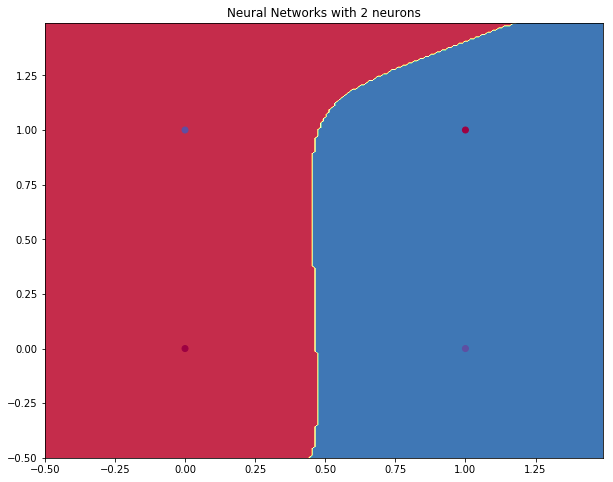

In [73]:
model, _ = build_model(X, y, 2)
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 2 neurons")

Iteration 0 Cost: 0.720030
Iteration 1000 Cost: 0.618398
Iteration 2000 Cost: 0.526784
Iteration 3000 Cost: 0.463529
Iteration 4000 Cost: 0.426409
Iteration 5000 Cost: 0.401629
Iteration 6000 Cost: 0.346461
Iteration 7000 Cost: 0.199930
Iteration 8000 Cost: 0.121053
Iteration 9000 Cost: 0.084581
Iteration 10000 Cost: 0.064743
Iteration 11000 Cost: 0.052315
Iteration 12000 Cost: 0.043794
Iteration 13000 Cost: 0.037592
Iteration 14000 Cost: 0.032882
Iteration 15000 Cost: 0.029189
Iteration 16000 Cost: 0.026219
Iteration 17000 Cost: 0.023781
Iteration 18000 Cost: 0.021747
Iteration 19000 Cost: 0.020024
Iteration 20000 Cost: 0.018548
Iteration 21000 Cost: 0.017269
Iteration 22000 Cost: 0.016152
Iteration 23000 Cost: 0.015167
Iteration 24000 Cost: 0.014293
Iteration 25000 Cost: 0.013512
Iteration 26000 Cost: 0.012810
Iteration 27000 Cost: 0.012177
Iteration 28000 Cost: 0.011602
Iteration 29000 Cost: 0.011077
Iteration 30000 Cost: 0.010598
Iteration 31000 Cost: 0.010157
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 4 neurons')

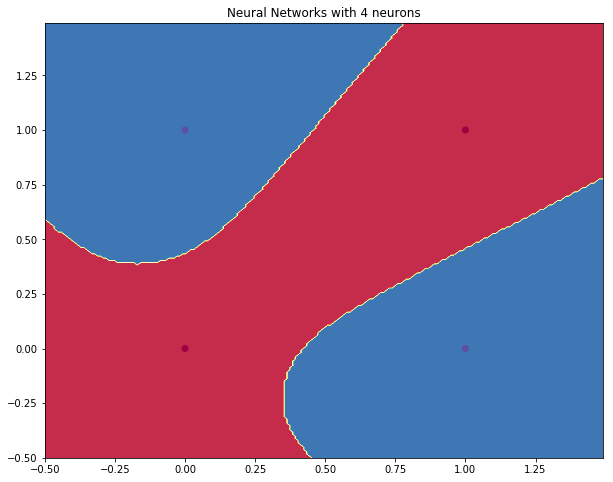

In [74]:
model, _ = build_model(X, y, 4)
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 4 neurons")

Iteration 0 Cost: 0.764333
Iteration 1000 Cost: 0.437663
Iteration 2000 Cost: 0.265287
Iteration 3000 Cost: 0.161226
Iteration 4000 Cost: 0.106908
Iteration 5000 Cost: 0.077044
Iteration 6000 Cost: 0.059105
Iteration 7000 Cost: 0.047451
Iteration 8000 Cost: 0.039388
Iteration 9000 Cost: 0.033528
Iteration 10000 Cost: 0.029102
Iteration 11000 Cost: 0.025653
Iteration 12000 Cost: 0.022897
Iteration 13000 Cost: 0.020650
Iteration 14000 Cost: 0.018785
Iteration 15000 Cost: 0.017215
Iteration 16000 Cost: 0.015876
Iteration 17000 Cost: 0.014722
Iteration 18000 Cost: 0.013717
Iteration 19000 Cost: 0.012835
Iteration 20000 Cost: 0.012055
Iteration 21000 Cost: 0.011361
Iteration 22000 Cost: 0.010740
Iteration 23000 Cost: 0.010180
Iteration 24000 Cost: 0.009674
Iteration 25000 Cost: 0.009213
Iteration 26000 Cost: 0.008793
Iteration 27000 Cost: 0.008409
Iteration 28000 Cost: 0.008055
Iteration 29000 Cost: 0.007729
Iteration 30000 Cost: 0.007427
Iteration 31000 Cost: 0.007147
Iteration 32000 Cost:

Text(0.5,1,u'Neural Networks with 5 neurons')

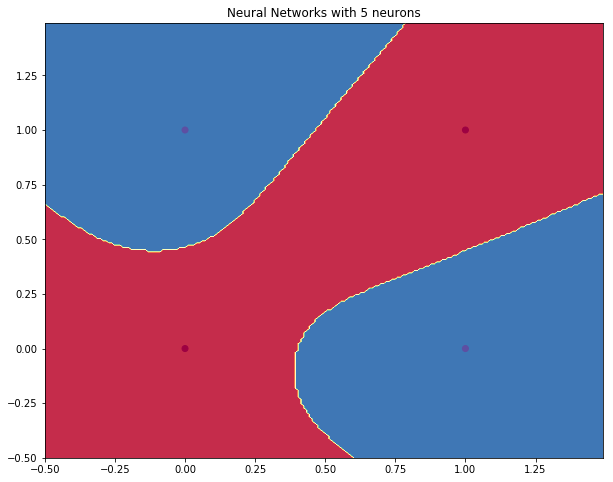

In [75]:
model, _ = build_model(X, y, 5)
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Neural Networks with 5 neurons")

In [41]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

### The problem of very deep neural networks
---------

<p> Theoritically, the main benefit of a very deep network is that it can **represent very complex functions**. Specifically, by using a deeper architecture, we can learn features at many different levels of abstraction, from edges (at the lower layers) to very complex features (at the deeper layers).</p><br/>

<p> However, using a deeper network doesn't always help in practice. The biggest problem that we will encounter when training a deeper network is the *vanishing gradients* problem: a condition where a very deep networks often have a gradient signal that goes to zero quickly, thus making gradient descent unbearably slow. </p><br/>

<p> More specifically, during gradient descent, as we backprop from the final layer back to the first layer, we are multiplying by the weight matrix on each step, and thus the gradient can decrease exponentially quickly to zero or, in rare cases, grow exponentially quickly and "explode" to take very large values. 

</p>
During training, you might therefore see the magnitude (or norm) of the gradient for the earlier layers descrease to zero very rapidly as training proceeds: 

<img src="images/vanishing_grad_kiank.png" style="width:450px;height:220px;">
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **Vanishing gradient** <br> The speed of learning decreases very rapidly for the early layers as the network trains </center></caption>

In [ ]:
s